In [26]:
#libraries used in below code

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error




In [31]:
df=pd.read_csv("Advertising.csv")



In [32]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [33]:
df=df.drop(['Unnamed: 0'], axis=1)
df


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [34]:
#no null values found

df.isnull().sum()


TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [36]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [37]:
df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [38]:
#data preprocessing

data1=df[['TV', 'Radio', 'Newspaper']]
data2=df['Sales']


In [39]:
#train-test split 80% training and 20% testing

Features_train, Features_test, Sales_train, Sales_test = train_test_split(data1, data2, test_size=0.2, random_state=42)


# Linear Regression

In [40]:
#to find best fitting relationship between the variables(dependent variable and one or more independent variable), and to 
#make predictions the association between them.
#y=mx+b
#overfitting can be happened 


In [41]:
#model training

model = LinearRegression()
model.fit(Features_train, Sales_train)


LinearRegression()

In [42]:
#model evaluation

prediction = model.predict(Features_test)
mse = mean_squared_error(Sales_test, prediction)
#average squared difference between the actual values and the predicted values
print(f"Mean Squared Error: {mse*100}")


Mean Squared Error: 317.4097353976104


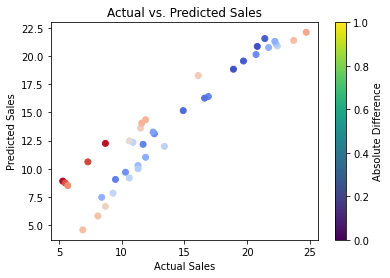

In [43]:
#visualization

#absolute difference between actual and predicted sales for creating colormap 
abs_diff = np.abs(Sales_test - prediction)

#Create a colormap for colors based on the absolute difference
colors = plt.cm.get_cmap('coolwarm')(abs_diff / max(abs_diff))  # Using coolwarm colormap

#Scatter plot with different colors based on the difference
plt.scatter(Sales_test, prediction, c=colors)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs. Predicted Sales")
plt.colorbar(label="Absolute Difference")
plt.show()




In [44]:
#prediction
#example values
newvalues = np.array([[104.0, 25.6, 10.9]])   
sales = model.predict(newvalues)
print(f"Predicted Sales: {sales[0]}")





Predicted Sales: 12.504426689590069


C:\Users\Pakistan\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# Random Forest

In [45]:
#random forest model is machine learning algorithm used for both classification and regression. it is based on bagging(bootstrap
#aggreagation) and utilize multiple decision trees for prediction. It prone overfit means overfit can be happened but less than
#linear regression. 
#its hyperparameters can be change like n_estimators.



In [46]:
#training and fit model

model = RandomForestRegressor(n_estimators=80, random_state=42)  
model.fit(Features_train, Sales_train)



RandomForestRegressor(n_estimators=80, random_state=42)

In [47]:
#evaluation

prediction = model.predict(Features_test)
mse = mean_squared_error(Sales_test, prediction)
#average squared difference between the actual values and the predicted values
print(f"Mean Squared Error: {mse*100}")




Mean Squared Error: 60.83540624999997


In [48]:
#predicting future sales

newvalues=np.array([[104.0, 25.6, 10.9]])   
sales = model.predict(newvalues)
print(f"Predicted Sales: {sales[0]}")




Predicted Sales: 12.286249999999999


C:\Users\Pakistan\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
